### Solving a  Multiclass classification problem using KNN, Multinomial Naive Bayes, Ensemble Models and Neural Network Models

* Dataset
This is data that confirmed the grade of performance with age and some exercise performance data.

columns
data shape : (13393, 12)

age : 20 ~64

gender : F,M

height_cm : (If you want to convert to feet, divide by 30.48)

weight_kg

body fat_%

diastolic : diastolic blood pressure (min)

systolic : systolic blood pressure (min)

gripForce

sit and bend forward_cm

sit-ups counts

broad jump_cm

class : A,B,C,D ( A: best) / stratified

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder # label encode the target
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import cohen_kappa_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout

In [2]:
# Ingnoring the warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,8)

In [3]:
# Loading the iris dataset available in seaborn library
data = pd.read_csv('bodyPerformance.csv')

In [4]:
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


### Giving labels to target column

In [5]:
le = LabelEncoder()

In [6]:
for i in ['gender','class']:
    data[i] = le.fit_transform(data[i])

### Gender
* Female - 0
* Male -1

### Class
* A- 0
* B- 1
* C- 2
* D- 3

In [7]:
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [8]:
data.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

### Visualization of dataset

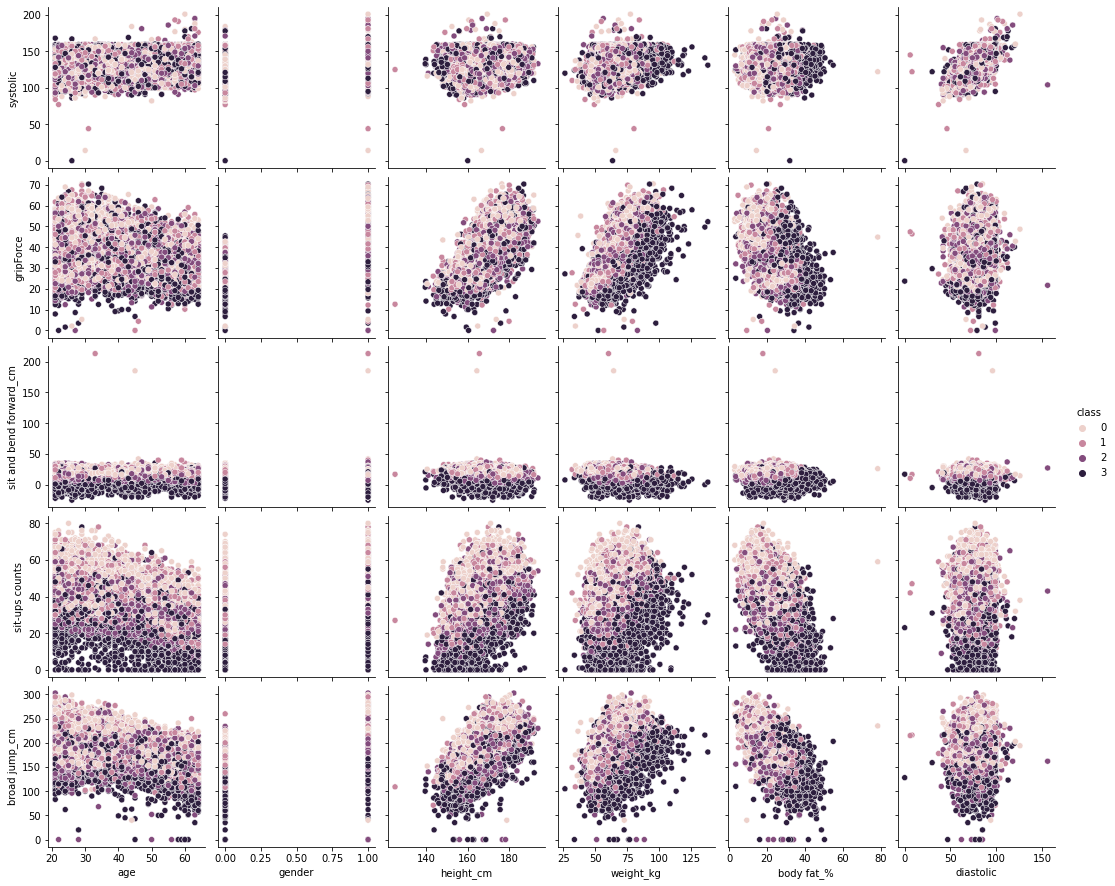

In [9]:
sns.pairplot(data=data,x_vars=['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',],
             y_vars=['systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
            hue='class')
plt.show()

### Creating function to compare Sklearn Models

In [10]:
def validation(test,pred):
    print('Confusion Matrix\n',confusion_matrix(test,pred))
    print('Accuracy',accuracy_score(test,pred))
    print('Cohen kappa Score',cohen_kappa_score(test,pred))
    print('Classification Report\n',classification_report(test,pred))

In [11]:
def model_results(model,x_train,y_train,x_test,y_test):
    print(str(model))

    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
   
    validation(y_test,y_pred)
    
    y_pred_prob = model.predict_proba(x_test)[:,1]

### Sklearn Models

In [12]:
x = data.drop(columns='class')
y = data['class']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=2)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(10714, 11) (10714,) (2679, 11) (2679,)


In [14]:
x_train_s = x_train.copy()
x_test_s = x_test.copy()
for i in x_train_s.columns:
    if i not in ['gender','class']:
        sc = MinMaxScaler()
        x_train_s[i] = sc.fit_transform(pd.DataFrame(x_train_s[i]))
        x_test_s[i] = sc.transform(pd.DataFrame(x_test_s[i]))       

In [15]:
x_train_s

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
12582,0.046512,1,0.707849,0.438795,0.186898,0.539281,0.689840,0.751420,0.170213,0.7125,0.779264
727,0.837209,0,0.425872,0.290019,0.524085,0.439414,0.609626,0.340909,0.186383,0.3625,0.491639
3022,0.069767,1,0.771802,0.388324,0.298651,0.432756,0.689840,0.593750,0.175745,0.7000,0.752508
6286,0.976744,0,0.386628,0.166855,0.657033,0.592543,0.759358,0.288352,0.157021,0.1875,0.170569
10686,0.674419,1,0.613372,0.333333,0.252408,0.512650,0.663102,0.718750,0.183830,0.4875,0.702341
...,...,...,...,...,...,...,...,...,...,...,...
2514,0.209302,1,0.754360,0.433145,0.319846,0.599201,0.679144,0.576705,0.150638,0.6625,0.856187
11798,0.139535,1,0.690407,0.298493,0.229287,0.499334,0.695187,0.629261,0.151489,0.5625,0.856187
6637,0.255814,0,0.488372,0.241055,0.499037,0.492676,0.577540,0.338068,0.135319,0.4625,0.565217
2575,0.651163,1,0.770349,0.516008,0.394990,0.599201,0.711230,0.661932,0.089787,0.3750,0.622074


In [16]:
x_test_s

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
5986,0.162791,1,0.803779,0.417137,0.254335,0.499334,0.550802,0.627841,0.163404,0.5625,0.715719
11080,0.046512,0,0.600291,0.340866,0.578035,0.432756,0.518717,0.367898,0.200851,0.5000,0.635452
9455,0.906977,0,0.495640,0.215631,0.429672,0.492676,0.727273,0.428977,0.203404,0.4500,0.508361
2477,0.139535,0,0.399709,0.150659,0.554913,0.359521,0.518717,0.234375,0.192340,0.2000,0.458194
11809,0.093023,1,0.741279,0.403955,0.211946,0.479361,0.604278,0.605114,0.180851,0.5625,0.802676
...,...,...,...,...,...,...,...,...,...,...,...
1331,0.325581,1,0.620640,0.347458,0.227360,0.505992,0.593583,0.717330,0.190213,0.7750,0.856187
2604,0.511628,1,0.671512,0.411488,0.333333,0.592543,0.737968,0.629261,0.194043,0.7500,0.819398
3259,0.069767,1,0.687500,0.412429,0.175337,0.446072,0.625668,0.644886,0.222553,0.8875,0.862876
10208,0.139535,0,0.495640,0.218456,0.614644,0.532623,0.604278,0.318182,0.179149,0.6250,0.521739


### KNN

In [17]:
model_results(KNeighborsClassifier(n_neighbors=7),x_train_s,y_train,x_test_s,y_test)

KNeighborsClassifier(n_neighbors=7)
Confusion Matrix
 [[531 120  24   3]
 [260 286 112  11]
 [119 212 301  57]
 [ 28  67 137 411]]
Accuracy 0.5707353490108249
Cohen kappa Score 0.42707442258340467
Classification Report
               precision    recall  f1-score   support

           0       0.57      0.78      0.66       678
           1       0.42      0.43      0.42       669
           2       0.52      0.44      0.48       689
           3       0.85      0.64      0.73       643

    accuracy                           0.57      2679
   macro avg       0.59      0.57      0.57      2679
weighted avg       0.59      0.57      0.57      2679



### Multinomial Naive Bayes

In [18]:
model_results(MultinomialNB(),x_train_s,y_train,x_test_s,y_test)

MultinomialNB()
Confusion Matrix
 [[374 221   6  77]
 [239 238  32 160]
 [130 253  95 211]
 [ 41  70  70 462]]
Accuracy 0.43635684957073534
Cohen kappa Score 0.25050219237868165
Classification Report
               precision    recall  f1-score   support

           0       0.48      0.55      0.51       678
           1       0.30      0.36      0.33       669
           2       0.47      0.14      0.21       689
           3       0.51      0.72      0.59       643

    accuracy                           0.44      2679
   macro avg       0.44      0.44      0.41      2679
weighted avg       0.44      0.44      0.41      2679



### Bagging

In [19]:
model_results(RandomForestClassifier(n_estimators=200,max_depth=6),x_train,y_train,x_test,y_test)

RandomForestClassifier(max_depth=6, n_estimators=200)
Confusion Matrix
 [[570  98   9   1]
 [212 308 118  31]
 [100 152 389  48]
 [ 20  32  62 529]]
Accuracy 0.6703994027622248
Cohen kappa Score 0.5603826910732796
Classification Report
               precision    recall  f1-score   support

           0       0.63      0.84      0.72       678
           1       0.52      0.46      0.49       669
           2       0.67      0.56      0.61       689
           3       0.87      0.82      0.85       643

    accuracy                           0.67      2679
   macro avg       0.67      0.67      0.67      2679
weighted avg       0.67      0.67      0.67      2679



### Boosting

In [20]:
model_results(GradientBoostingClassifier(n_estimators=200,max_depth=5),x_train,y_train,x_test,y_test)

GradientBoostingClassifier(max_depth=5, n_estimators=200)
Confusion Matrix
 [[569  93  13   3]
 [143 413  96  17]
 [ 45 135 475  34]
 [ 12  33  50 548]]
Accuracy 0.7484135871593879
Cohen kappa Score 0.6644305230353397
Classification Report
               precision    recall  f1-score   support

           0       0.74      0.84      0.79       678
           1       0.61      0.62      0.62       669
           2       0.75      0.69      0.72       689
           3       0.91      0.85      0.88       643

    accuracy                           0.75      2679
   macro avg       0.75      0.75      0.75      2679
weighted avg       0.75      0.75      0.75      2679



### ANN Model

In [21]:
y_train_enc = pd.get_dummies(y_train,dtype=int)
y_test_enc = pd.get_dummies(y_test,dtype=int)

In [57]:
model = Sequential()
model.add(Dense(200,input_dim = 11, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(700,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [58]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
history=model.fit(x_train_s,y_train_enc,epochs=300,batch_size=500,verbose=1)

Epoch 1/300
22/22 [==============================] - 5s 121ms/step - loss: 1.2637 - accuracy: 0.3915
Epoch 2/300
22/22 [==============================] - 3s 121ms/step - loss: 1.0999 - accuracy: 0.4880
Epoch 3/300
22/22 [==============================] - 3s 123ms/step - loss: 1.0462 - accuracy: 0.5193
Epoch 4/300
22/22 [==============================] - 3s 125ms/step - loss: 1.0189 - accuracy: 0.5292
Epoch 5/300
22/22 [==============================] - 3s 121ms/step - loss: 0.9865 - accuracy: 0.5542
Epoch 6/300
22/22 [==============================] - 3s 122ms/step - loss: 0.9622 - accuracy: 0.5618
Epoch 7/300
22/22 [==============================] - 3s 121ms/step - loss: 0.9487 - accuracy: 0.5680
Epoch 8/300
22/22 [==============================] - 3s 121ms/step - loss: 0.9268 - accuracy: 0.5804
Epoch 9/300
22/22 [==============================] - 3s 122ms/step - loss: 0.9104 - accuracy: 0.5916
Epoch 10/300
22/22 [==============================] - 3s 121ms/step - loss: 0.8994 - accura

22/22 [==============================] - 3s 128ms/step - loss: 0.6420 - accuracy: 0.7300
Epoch 82/300
22/22 [==============================] - 3s 122ms/step - loss: 0.6462 - accuracy: 0.7257
Epoch 83/300
22/22 [==============================] - 3s 121ms/step - loss: 0.6393 - accuracy: 0.7277
Epoch 84/300
22/22 [==============================] - 3s 123ms/step - loss: 0.6450 - accuracy: 0.7311
Epoch 85/300
22/22 [==============================] - 3s 125ms/step - loss: 0.6337 - accuracy: 0.7318
Epoch 86/300
22/22 [==============================] - 3s 128ms/step - loss: 0.6371 - accuracy: 0.7347
Epoch 87/300
22/22 [==============================] - 3s 123ms/step - loss: 0.6326 - accuracy: 0.7372
Epoch 88/300
22/22 [==============================] - 3s 124ms/step - loss: 0.6364 - accuracy: 0.7327
Epoch 89/300
22/22 [==============================] - 3s 122ms/step - loss: 0.6281 - accuracy: 0.7391
Epoch 90/300
22/22 [==============================] - 3s 124ms/step - loss: 0.6362 - accuracy: 

22/22 [==============================] - 3s 127ms/step - loss: 0.5617 - accuracy: 0.7674
Epoch 161/300
22/22 [==============================] - 3s 125ms/step - loss: 0.5604 - accuracy: 0.7688
Epoch 162/300
22/22 [==============================] - 3s 122ms/step - loss: 0.5576 - accuracy: 0.7660
Epoch 163/300
22/22 [==============================] - 3s 128ms/step - loss: 0.5671 - accuracy: 0.7631
Epoch 164/300
22/22 [==============================] - 3s 125ms/step - loss: 0.5661 - accuracy: 0.7670
Epoch 165/300
22/22 [==============================] - 3s 122ms/step - loss: 0.5566 - accuracy: 0.7677
Epoch 166/300
22/22 [==============================] - 3s 124ms/step - loss: 0.5579 - accuracy: 0.7637
Epoch 167/300
22/22 [==============================] - 3s 125ms/step - loss: 0.5460 - accuracy: 0.7723
Epoch 168/300
22/22 [==============================] - 3s 125ms/step - loss: 0.5562 - accuracy: 0.7688
Epoch 169/300
22/22 [==============================] - 3s 127ms/step - loss: 0.5538 - a

22/22 [==============================] - 3s 125ms/step - loss: 0.4770 - accuracy: 0.8036
Epoch 240/300
22/22 [==============================] - 3s 124ms/step - loss: 0.4830 - accuracy: 0.7997
Epoch 241/300
22/22 [==============================] - 3s 123ms/step - loss: 0.4841 - accuracy: 0.8018
Epoch 242/300
22/22 [==============================] - 3s 124ms/step - loss: 0.4943 - accuracy: 0.7934
Epoch 243/300
22/22 [==============================] - 3s 125ms/step - loss: 0.5111 - accuracy: 0.7863
Epoch 244/300
22/22 [==============================] - 3s 128ms/step - loss: 0.4729 - accuracy: 0.8061
Epoch 245/300
22/22 [==============================] - 3s 124ms/step - loss: 0.4876 - accuracy: 0.7951
Epoch 246/300
22/22 [==============================] - 3s 122ms/step - loss: 0.4712 - accuracy: 0.8049
Epoch 247/300
22/22 [==============================] - 3s 121ms/step - loss: 0.4676 - accuracy: 0.8073
Epoch 248/300
22/22 [==============================] - 3s 124ms/step - loss: 0.4648 - a

Text(0, 0.5, '%age')

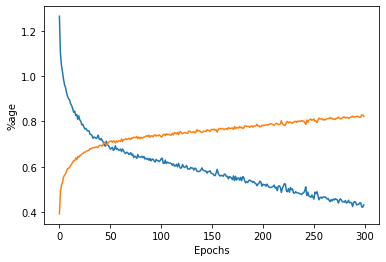

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('%age')

In [61]:
test_eval= model.evaluate(x_test_s,y_test_enc, verbose=1)

84/84 [==============================] - 1s 7ms/step - loss: 0.7530 - accuracy: 0.7171


In [62]:
y_pred = model.predict(x_test_s)

84/84 [==============================] - 1s 7ms/step


In [63]:
y_pred_nn = []
for i in range(x_test.shape[0]):
    y_pred_nn.append(np.argmax(y_pred[i]))
y_pred_nn = pd.Series(y_pred_nn)
y_pred_nn

0       2
1       1
2       0
3       3
4       2
       ..
2674    0
2675    0
2676    0
2677    2
2678    1
Length: 2679, dtype: int64

In [64]:
validation(y_test,y_pred_nn)

Confusion Matrix
 [[559 106   9   4]
 [155 409  79  26]
 [ 47 156 434  52]
 [ 12  36  76 519]]
Accuracy 0.7170586039567003
Cohen kappa Score 0.6226549517151263
Classification Report
               precision    recall  f1-score   support

           0       0.72      0.82      0.77       678
           1       0.58      0.61      0.59       669
           2       0.73      0.63      0.67       689
           3       0.86      0.81      0.83       643

    accuracy                           0.72      2679
   macro avg       0.72      0.72      0.72      2679
weighted avg       0.72      0.72      0.72      2679



So the objective was to predict the body grade of a person based on age and excersice data. A 7-layered neural network model seems to perform better on this data. The accuracy of the model is ~72% while recall for the grades are follows:

Garde A: 82%

Grade B: 61%

Garde C: 63%

Grade D: 81%

The model is able to correctly predict Grade A and D with overall F1 77% and 83%. The performce in prediction actual Grade B and C is quite low with F1 59% and 67%.